<a href="https://colab.research.google.com/github/aliasoblomov/SEO-Resources/blob/main/TFIDF2_Seobility_Clone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top 10 URLs from unique domains:
https://www.w3schools.com/sql/sql_join.asp
https://www.ibm.com/docs/en/netezza?topic=jo-types-joins
https://learn.microsoft.com/en-us/sql/relational-databases/performance/joins?view=sql-server-ver16
https://www.geeksforgeeks.org/sql-join-set-1-inner-left-right-and-full-joins/
https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html
https://en.wikipedia.org/wiki/Join_(SQL)
https://spark.apache.org/docs/latest/sql-ref-syntax-qry-select-join.html
https://www.atlassian.com/data/sql/sql-join-types-explained-visually
https://www.coursera.org/articles/sql-join-types
https://docs.oracle.com/cd/E70265_01/platform.11-3/EndecaPlatForge/html/cfrg_joins_about_types_types.xmlconcept_1AB72EDF1A6F43058522D52AA8BA902A.html


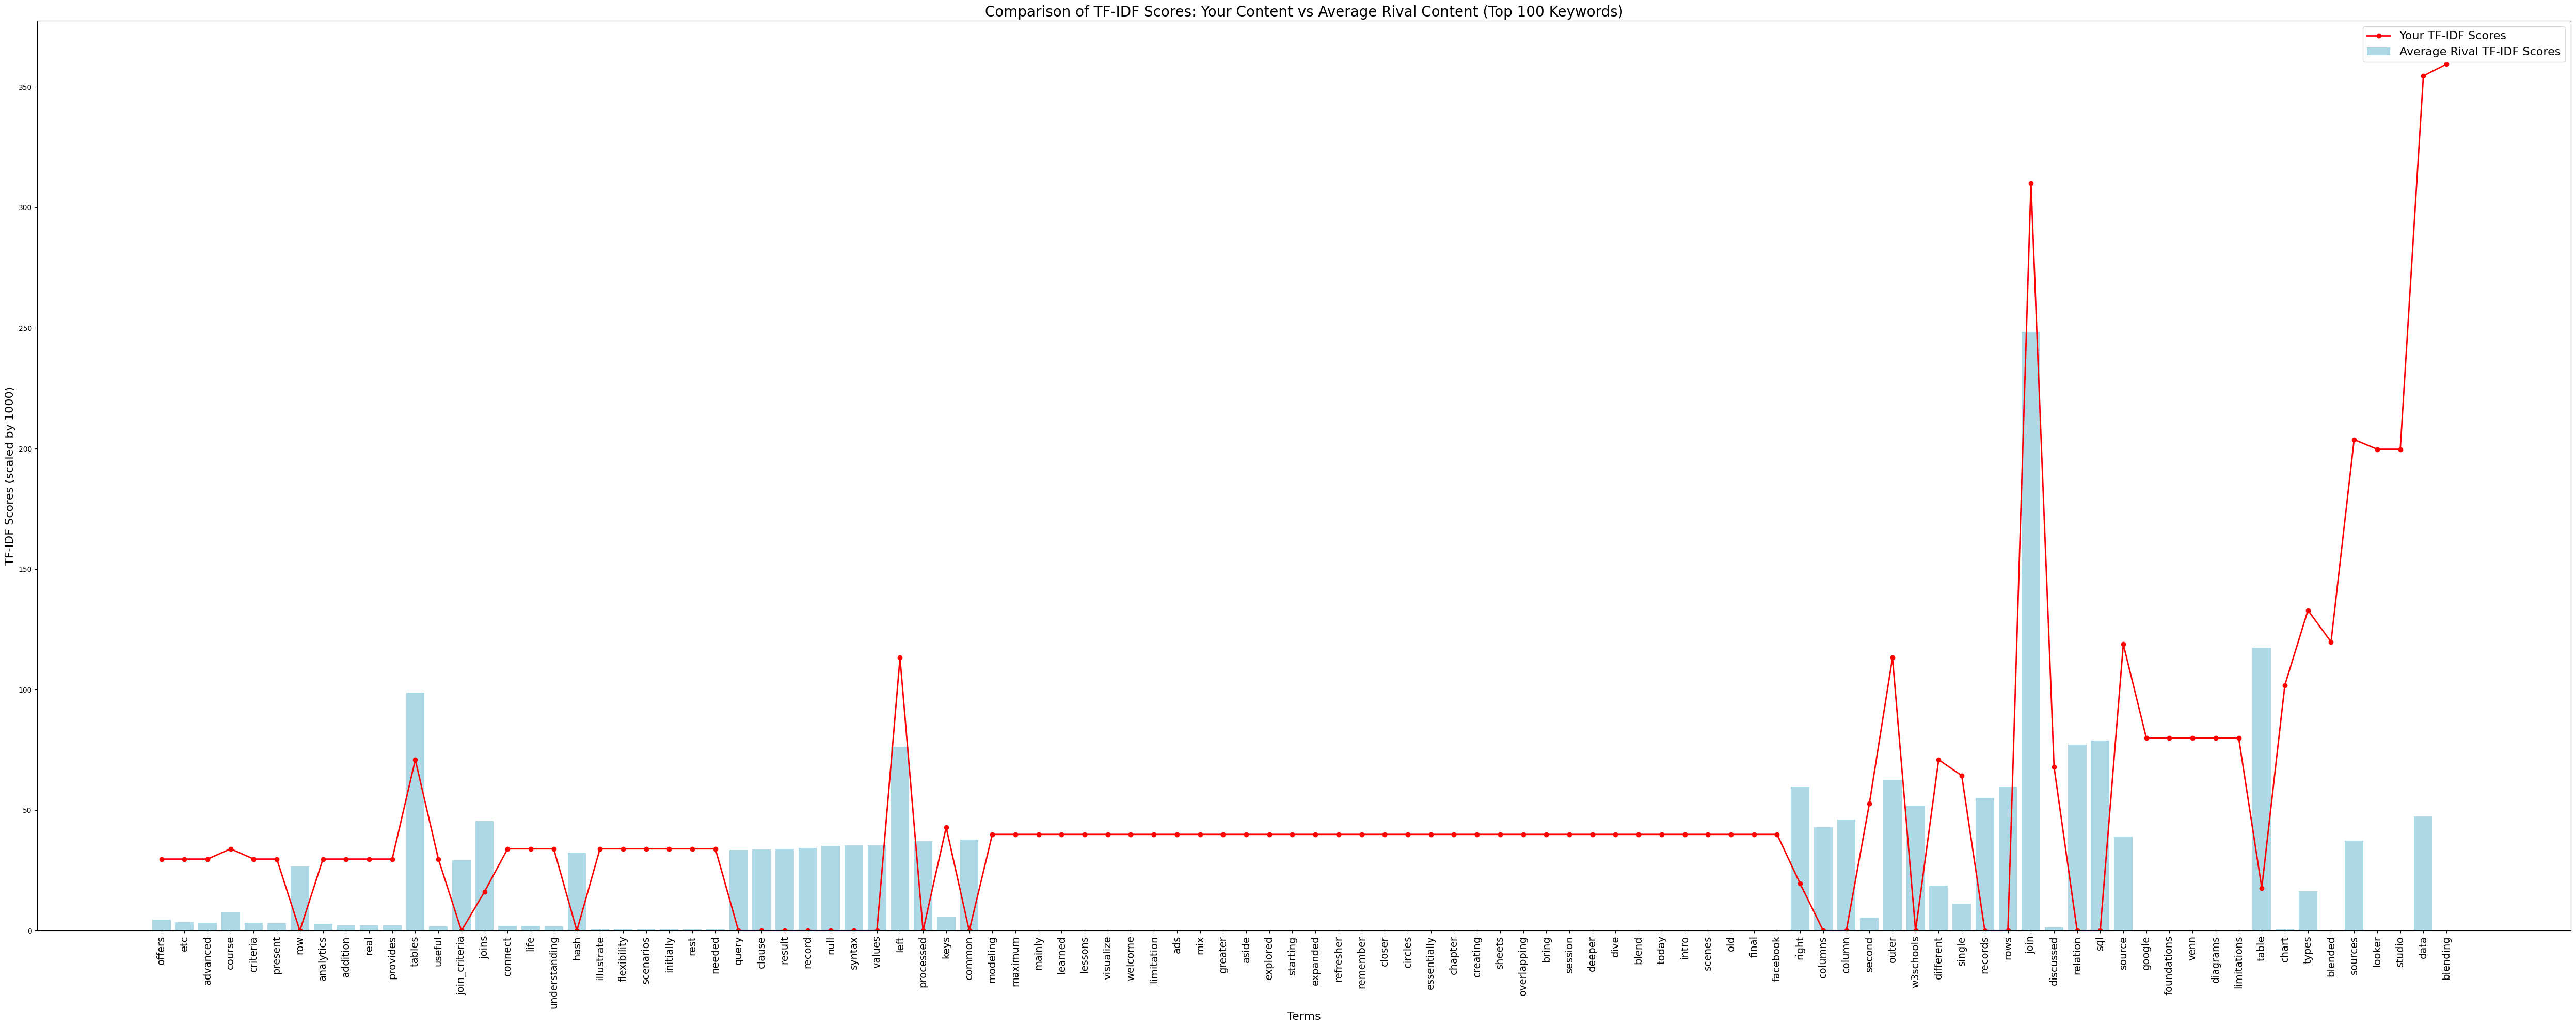

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data exported and ready for download as tfidf_comparison_top_100.csv


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import requests
from bs4 import BeautifulSoup
from googlesearch import search
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from urllib.parse import urlparse

# Load SpaCy model for POS tagging
nlp = spacy.load('en_core_web_sm')

# Sample content: replace this with your content
my_content = """
In the previous lessons we discussed the foundations of data blending: what data blending is and how it works behind the scenes mainly using the Left Outer Join Type.

We learned how useful data blending can be for us to bring up to five data sources (e.g. Google Analytics, Google Sheets, Facebook Ads data source, etc.) together into a single, blended data source so we can visualize it on a chart.

In this chapter we will learn about the other join types aside from Left Outer Join.

10.1. Intro & Limitations of Old Data Blending

Welcome to the advanced course on data modeling and data blending in Looker Studio! In our last session, we explored the foundations of data blending and discussed the left outer join. Today, we'll dive deeper into the rest of the join types available in Looker Studio, starting with some examples of the left join.

Data Blending: A Refresher
Remember, in Looker Studio, we can only use one data source per chart. However, we can blend data sources based on specific criteria and join keys, essentially creating a single blended data source. This allows us to connect multiple data sources to a single chart.

Initially, data blending had some limitations:

A maximum of five data sources could be blended.
Only left outer join was supported.
The same join key needed to be present in all data sources.
While the limitation of blending up to five data sources still exists, we now have access to multiple join types and keys across different joins.

Expanded Join Types
In addition to the left outer join, Looker Studio now offers right, inner, full outer, and cross join types. This provides greater flexibility in how you can mix and match different join types between tables. For example, you might want a left join between the first and second tables, a full outer join between the second and third tables, and a cross join for the final table.

Understanding Join Types with Venn Diagrams
Venn diagrams are often used to illustrate different join types. These overlapping circles show how data from different tables is combined based on the join type being used.

Let's take a closer look at the various join types in Looker Studio and how they can be applied in real-life scenarios.

"""

# Function to get top 10 Google SERP results for a keyword (unique domains)
def get_top_10_unique_domain_results(keyword):
    try:
        results = []
        domains = set()
        for url in search(keyword, num=20, stop=20, pause=2):
            domain = urlparse(url).netloc
            if domain not in domains:
                domains.add(domain)
                results.append(url)
            if len(results) == 10:
                break
        return results
    except Exception as e:
        print(f"Error during Google search: {e}")
        return []

# Function to extract content from a URL
def extract_content_from_url(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            paragraphs = soup.find_all('p')
            content = ' '.join([p.get_text() for p in paragraphs])
            return content
        else:
            return ""
    except Exception as e:
        print(f"Error fetching content from {url}: {e}")
        return ""

# Keyword to search for
target_keyword = "Join Types"

# Get top 10 unique domain results from Google
rival_urls = get_top_10_unique_domain_results(target_keyword)

# Print the top 10 URLs
print("Top 10 URLs from unique domains:")
for url in rival_urls:
    print(url)

# Extract content from each rival URL
rival_contents = []
for url in rival_urls:
    content = extract_content_from_url(url)
    if content:
        rival_contents.append(content)

# List of documents
if rival_contents:
    documents = [my_content] + rival_contents
else:
    print("No rival content available. Exiting...")
    exit()

# Function to filter out stopwords, auxiliary verbs, and other less informative words
def filter_terms(terms):
    filtered_terms = []
    for term in terms:
        doc = nlp(term)
        if not doc[0].is_stop and doc[0].pos_ not in ['AUX', 'PRON', 'DET', 'ADP', 'CCONJ']:
            filtered_terms.append(term)
    return filtered_terms

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the model and transform the documents into TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(documents).toarray()

# Extract feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Filter feature names to exclude less informative words
filtered_feature_names = filter_terms(feature_names)

# Filter TF-IDF matrix to only include filtered terms
filtered_indices = [i for i, term in enumerate(feature_names) if term in filtered_feature_names]
tfidf_matrix_filtered = tfidf_matrix[:, filtered_indices]

# Get TF-IDF for each document
tfidf_scores_list = [tfidf_matrix_filtered[i] for i in range(len(documents))]

# Calculate average TF-IDF scores for rivals
avg_rival_tfidf_scores = np.mean(tfidf_scores_list[1:], axis=0)

# Multiply scores by 1000 for better visualization
my_tfidf_scores_scaled = [score * 1000 for score in tfidf_scores_list[0]]
avg_rival_tfidf_scores_scaled = [score * 1000 for score in avg_rival_tfidf_scores]

# Calculate differences between your TF-IDF scores and the average rival scores
differences = [abs(my_score - avg_score) for my_score, avg_score in zip(my_tfidf_scores_scaled, avg_rival_tfidf_scores_scaled)]

# Get the indices of the top 100 terms with the most differences
top_100_indices = np.argsort(differences)[-100:]

# Filter the data to only include the top 100 terms
filtered_top_feature_names = [filtered_feature_names[i] for i in top_100_indices]
filtered_my_tfidf_scores = [my_tfidf_scores_scaled[i] for i in top_100_indices]
filtered_avg_rival_tfidf_scores = [avg_rival_tfidf_scores_scaled[i] for i in top_100_indices]

# Plot the comparison between your TF-IDF scores and the average rival scores for the top 100 terms
fig, ax = plt.subplots(figsize=(50, 20))  # Increase figure width and height for better visibility
x = np.arange(len(filtered_top_feature_names))

# Plot average rival TF-IDF scores as bars
ax.bar(x, filtered_avg_rival_tfidf_scores, color='lightblue', label='Average Rival TF-IDF Scores')

# Plot your TF-IDF scores as points connected by lines
ax.plot(x, filtered_my_tfidf_scores, color='red', marker='o', linestyle='-', linewidth=2, label='Your TF-IDF Scores')

ax.set_xlabel('Terms', fontsize=16)
ax.set_ylabel('TF-IDF Scores (scaled by 1000)', fontsize=16)
ax.set_title('Comparison of TF-IDF Scores: Your Content vs Average Rival Content (Top 100 Keywords)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(filtered_top_feature_names, rotation=90, fontsize=14)
ax.legend(fontsize=16)

plt.tight_layout()
plt.show()

# Export the filtered data to a CSV file
from google.colab import files

csv_data = {
    'Term': filtered_top_feature_names,
    'Your TF-IDF Score (scaled)': filtered_my_tfidf_scores,
    'Average Rival TF-IDF Score (scaled)': filtered_avg_rival_tfidf_scores
}
df = pd.DataFrame(csv_data)
df.to_csv('tfidf_comparison_top_100.csv', index=False)
files.download('tfidf_comparison_top_100.csv')
print("Data exported and ready for download as tfidf_comparison_top_100.csv")

Enter '1' to input text content or '2' to enter a URL: 2
Please enter the URL: https://lookerstudiomasterclass.com/chapter-10-data-blending-join-types-explained
Enter a keyword to search for rivals: Join Types
Top 10 URLs from unique domains:
https://www.w3schools.com/sql/sql_join.asp
https://www.ibm.com/docs/en/netezza?topic=jo-types-joins
https://learn.microsoft.com/en-us/sql/relational-databases/performance/joins?view=sql-server-ver16
https://www.geeksforgeeks.org/sql-join-set-1-inner-left-right-and-full-joins/
https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html
https://en.wikipedia.org/wiki/Join_(SQL)
https://spark.apache.org/docs/latest/sql-ref-syntax-qry-select-join.html
https://www.coursera.org/articles/sql-join-types
https://docs.oracle.com/cd/E70265_01/platform.11-3/EndecaPlatForge/html/cfrg_joins_about_types_types.xmlconcept_1AB72EDF1A6F43058522D52AA8BA902A.html
https://www.atlassian.com/data/sql/sql-join-types-explained-visually
No meaningful content foun

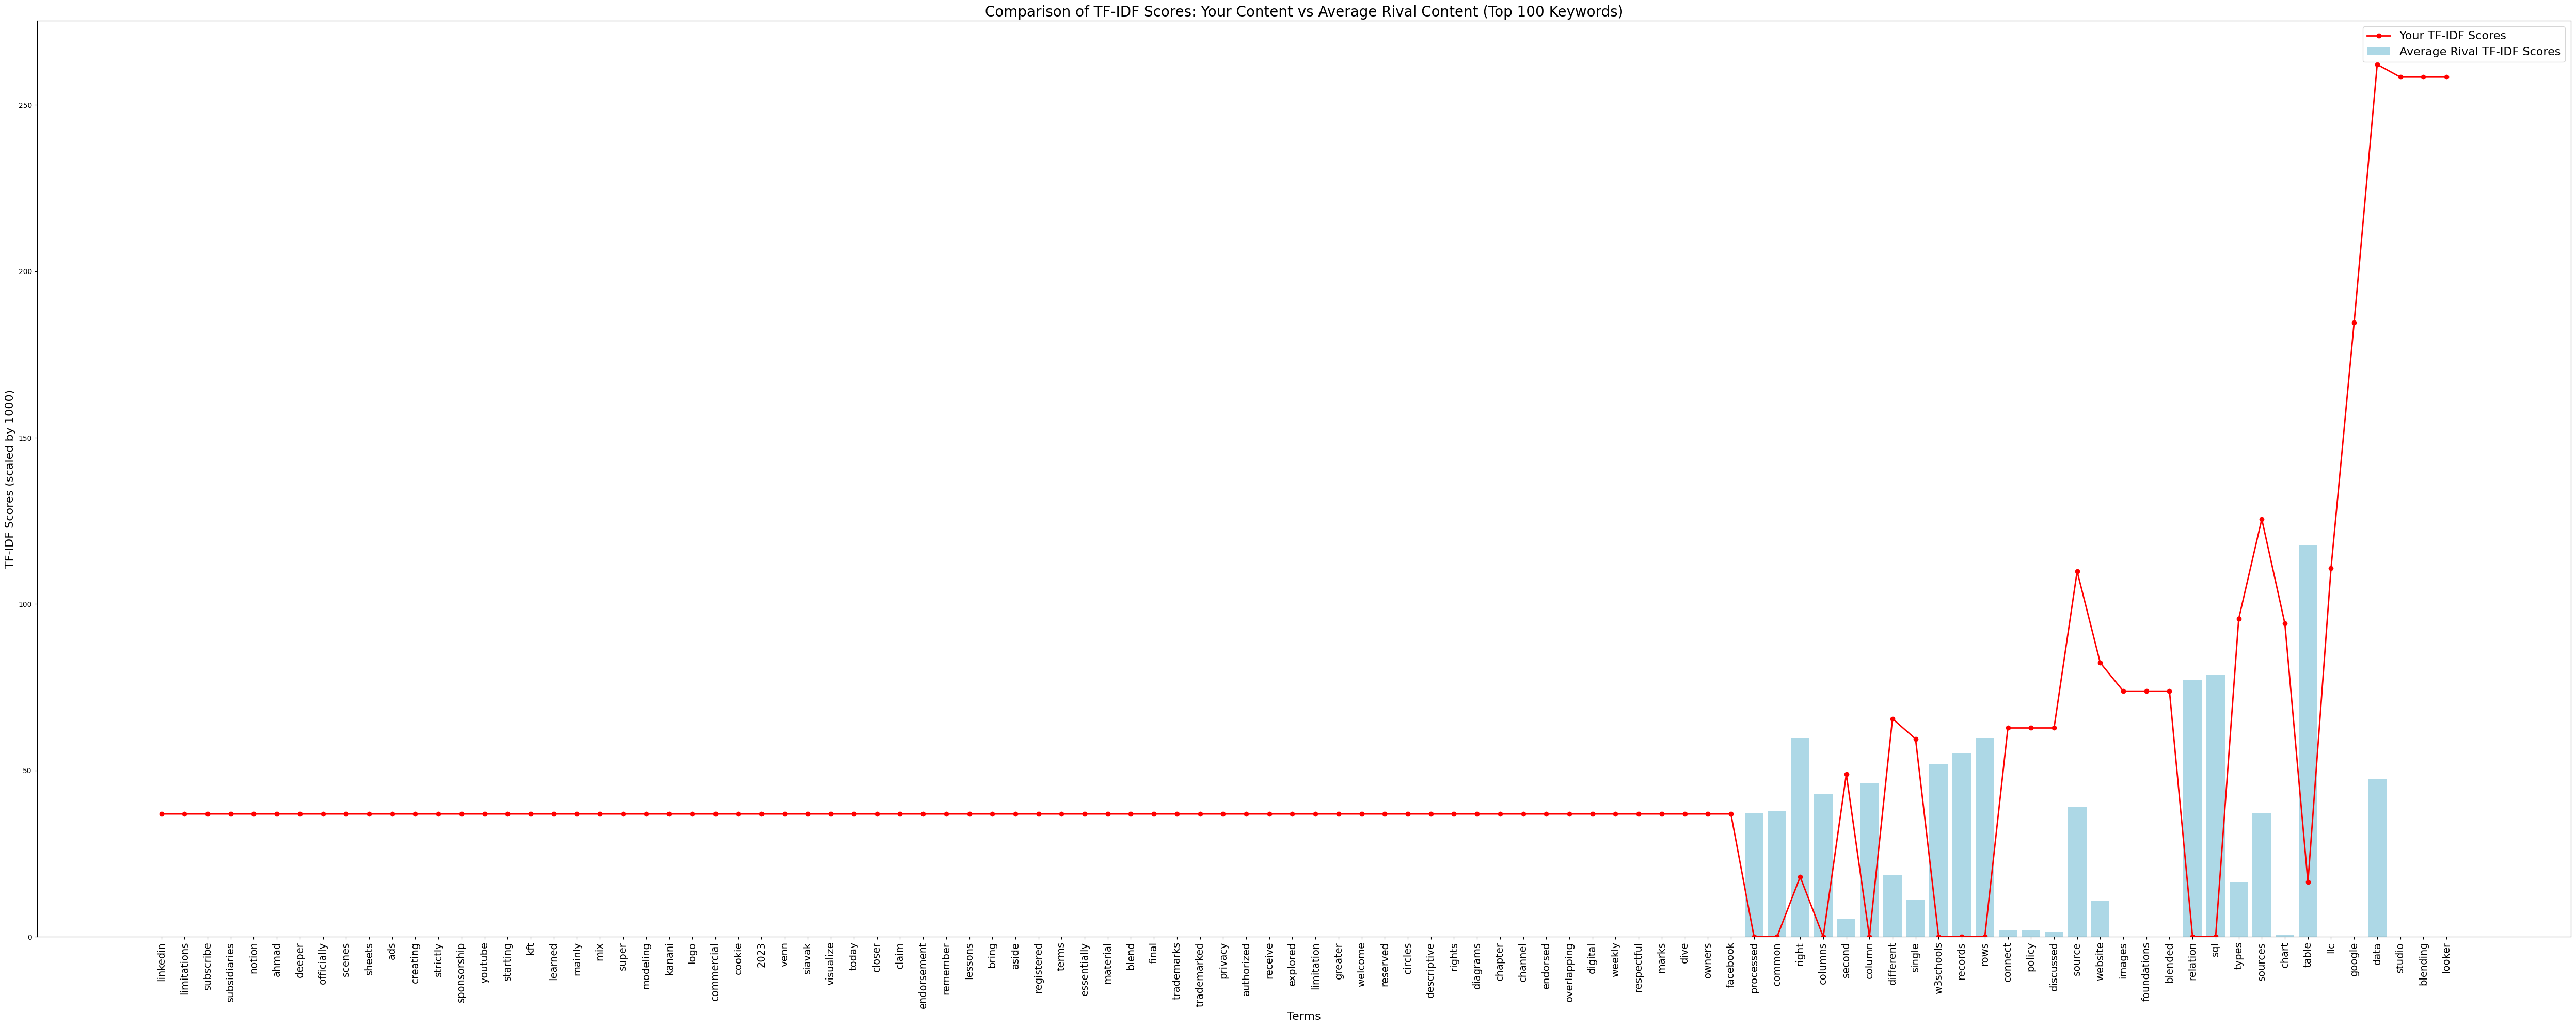

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data exported and ready for download as tfidf_comparison_top_100.csv


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from urllib.parse import urlparse
from googlesearch import search
import time

# Load SpaCy model for POS tagging
nlp = spacy.load('en_core_web_sm')

# Function to get content from user input
def get_user_content():
    content_type = input("Enter '1' to input text content or '2' to enter a URL: ")
    if content_type == '1':
        return input("Please enter your content: ")
    elif content_type == '2':
        url = input("Please enter the URL: ")
        return extract_content_from_url(url)
    else:
        print("Invalid input. Please enter '1' or '2'.")
        return get_user_content()

# Function to extract content from a URL with retries and user-agent header
def extract_content_from_url(url, retries=3, timeout=10):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    for attempt in range(retries):
        try:
            response = requests.get(url, headers=headers, timeout=timeout)
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                paragraphs = soup.find_all('p')
                content = ' '.join([p.get_text() for p in paragraphs])
                if content.strip():
                    return content
                else:
                    print(f"No meaningful content found at {url}. Attempt {attempt + 1} of {retries}.")
            else:
                print(f"Failed to retrieve content from the URL (Status code: {response.status_code}). Attempt {attempt + 1} of {retries}.")
        except Exception as e:
            print(f"Error fetching content from {url}: {e}. Attempt {attempt + 1} of {retries}.")
        time.sleep(2)  # Wait before retrying
    return ""

# Function to get top 10 Google SERP results for a keyword (unique domains)
def get_top_10_unique_domain_results(keyword):
    try:
        results = []
        domains = set()
        for url in search(keyword, num=20, stop=20, pause=2):
            domain = urlparse(url).netloc
            if domain not in domains:
                domains.add(domain)
                results.append(url)
            if len(results) == 10:
                break
        return results
    except Exception as e:
        print(f"Error during Google search: {e}")
        return []

# Get user content
my_content = get_user_content()
if not my_content:
    print("No valid content provided. Exiting...")
    exit()

# Keyword to search for
target_keyword = input("Enter a keyword to search for rivals: ")

# Get top 10 unique domain results from Google
rival_urls = get_top_10_unique_domain_results(target_keyword)

# Print the top 10 URLs
print("Top 10 URLs from unique domains:")
for url in rival_urls:
    print(url)

# Extract content from each rival URL
rival_contents = []
for url in rival_urls:
    content = extract_content_from_url(url)
    if content:
        rival_contents.append(content)

# List of documents
if rival_contents:
    documents = [my_content] + rival_contents
else:
    print("No rival content available. Exiting...")
    exit()

# Function to filter out stopwords, auxiliary verbs, and other less informative words
def filter_terms(terms):
    filtered_terms = []
    for term in terms:
        doc = nlp(term)
        if not doc[0].is_stop and doc[0].pos_ not in ['AUX', 'PRON', 'DET', 'ADP', 'CCONJ']:
            filtered_terms.append(term)
    return filtered_terms

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the model and transform the documents into TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(documents).toarray()

# Extract feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Filter feature names to exclude less informative words
filtered_feature_names = filter_terms(feature_names)

# Filter TF-IDF matrix to only include filtered terms
filtered_indices = [i for i, term in enumerate(feature_names) if term in filtered_feature_names]
tfidf_matrix_filtered = tfidf_matrix[:, filtered_indices]

# Get TF-IDF for each document
tfidf_scores_list = [tfidf_matrix_filtered[i] for i in range(len(documents))]

# Calculate average TF-IDF scores for rivals
avg_rival_tfidf_scores = np.mean(tfidf_scores_list[1:], axis=0)

# Multiply scores by 1000 for better visualization
my_tfidf_scores_scaled = [score * 1000 for score in tfidf_scores_list[0]]
avg_rival_tfidf_scores_scaled = [score * 1000 for score in avg_rival_tfidf_scores]

# Calculate differences between your TF-IDF scores and the average rival scores
differences = [abs(my_score - avg_score) for my_score, avg_score in zip(my_tfidf_scores_scaled, avg_rival_tfidf_scores_scaled)]

# Get the indices of the top 100 terms with the most differences
top_100_indices = np.argsort(differences)[-100:]

# Filter the data to only include the top 100 terms
filtered_top_feature_names = [filtered_feature_names[i] for i in top_100_indices]
filtered_my_tfidf_scores = [my_tfidf_scores_scaled[i] for i in top_100_indices]
filtered_avg_rival_tfidf_scores = [avg_rival_tfidf_scores_scaled[i] for i in top_100_indices]

# Plot the comparison between your TF-IDF scores and the average rival scores for the top 100 terms
fig, ax = plt.subplots(figsize=(50, 20))  # Increase figure width and height for better visibility
x = np.arange(len(filtered_top_feature_names))

# Plot average rival TF-IDF scores as bars
ax.bar(x, filtered_avg_rival_tfidf_scores, color='lightblue', label='Average Rival TF-IDF Scores')

# Plot your TF-IDF scores as points connected by lines
ax.plot(x, filtered_my_tfidf_scores, color='red', marker='o', linestyle='-', linewidth=2, label='Your TF-IDF Scores')

ax.set_xlabel('Terms', fontsize=16)
ax.set_ylabel('TF-IDF Scores (scaled by 1000)', fontsize=16)
ax.set_title('Comparison of TF-IDF Scores: Your Content vs Average Rival Content (Top 100 Keywords)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(filtered_top_feature_names, rotation=90, fontsize=14)
ax.legend(fontsize=16)

plt.tight_layout()
plt.show()

# Export the filtered data to a CSV file
from google.colab import files

csv_data = {
    'Term': filtered_top_feature_names,
    'Your TF-IDF Score (scaled)': filtered_my_tfidf_scores,
    'Average Rival TF-IDF Score (scaled)': filtered_avg_rival_tfidf_scores
}
df = pd.DataFrame(csv_data)
df.to_csv('tfidf_comparison_top_100.csv', index=False)
files.download('tfidf_comparison_top_100.csv')
print("Data exported and ready for download as tfidf_comparison_top_100.csv")

Enter '1' to input text content or '2' to enter a URL: 2
Please enter the URL: 2
Error fetching content from 2: Invalid URL '2': No scheme supplied. Perhaps you meant https://2?. Attempt 1 of 2.
Error fetching content from 2: Invalid URL '2': No scheme supplied. Perhaps you meant https://2?. Attempt 2 of 2.
No valid content provided. Exiting...
Enter a keyword to search for rivals: Join Types
Top 10 URLs from unique domains:
https://www.w3schools.com/sql/sql_join.asp
https://www.ibm.com/docs/en/netezza?topic=jo-types-joins
https://learn.microsoft.com/en-us/sql/relational-databases/performance/joins?view=sql-server-ver16
https://www.geeksforgeeks.org/sql-join-set-1-inner-left-right-and-full-joins/
https://www.devart.com/dbforge/sql/sqlcomplete/sql-join-statements.html
https://en.wikipedia.org/wiki/Join_(SQL)
https://spark.apache.org/docs/latest/sql-ref-syntax-qry-select-join.html
https://www.atlassian.com/data/sql/sql-join-types-explained-visually
https://www.coursera.org/articles/sql-j

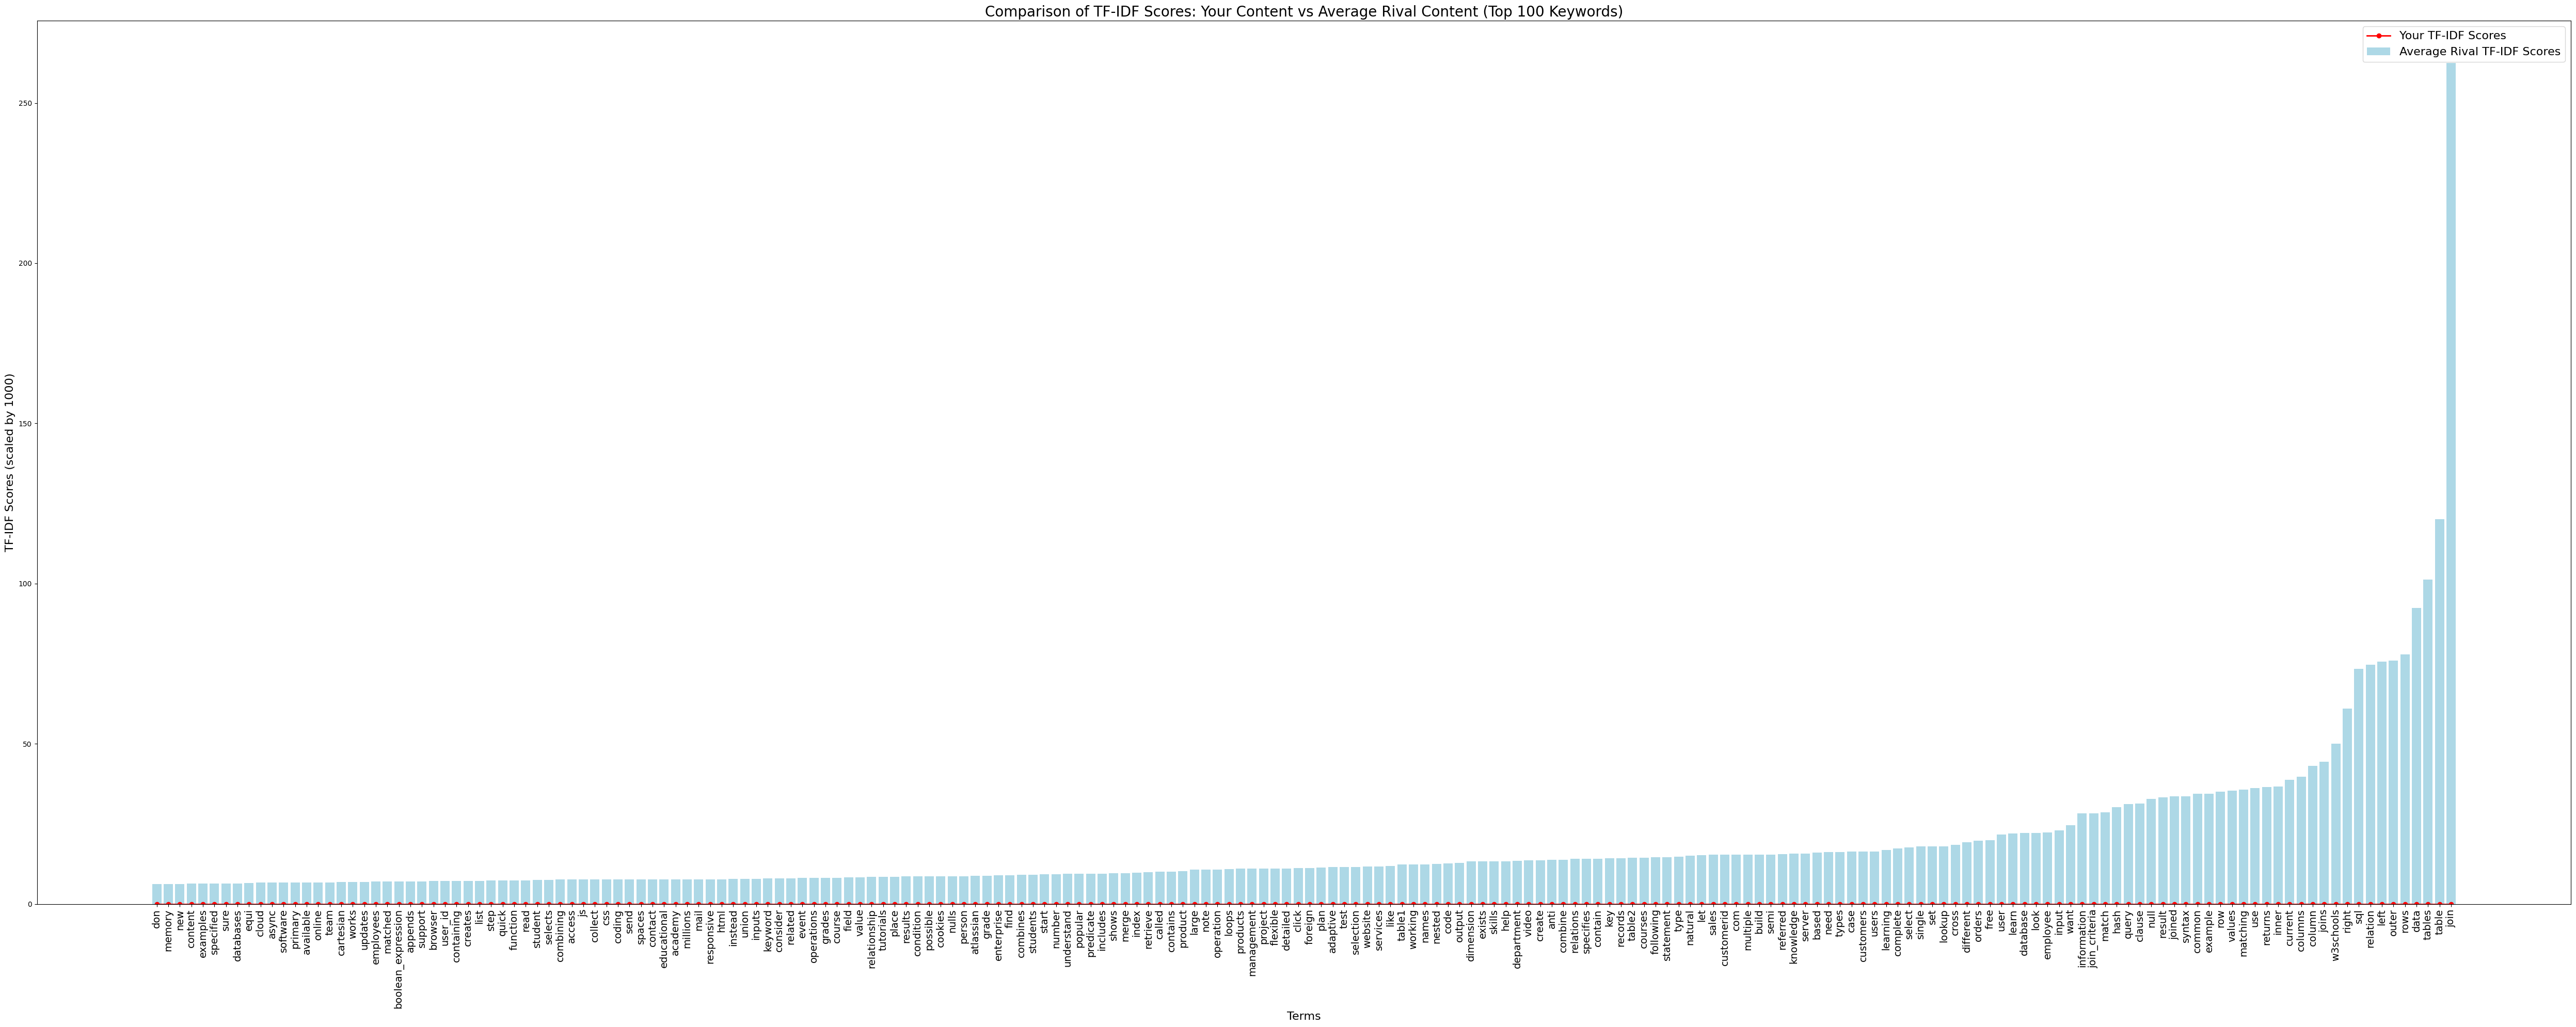

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data exported and ready for download as tfidf_comparison_top_100.csv


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from urllib.parse import urlparse
from googlesearch import search
import time

# Load SpaCy model for POS tagging
nlp = spacy.load('en_core_web_sm')

# Function to get content from user input
def get_user_content():
    content_type = input("Enter '1' to input text content or '2' to enter a URL: ")
    if content_type == '1':
        return input("Please enter your content: ")
    elif content_type == '2':
        url = input("Please enter the URL: ")
        return extract_content_from_url(url)
    else:
        print("Invalid input. Please enter '1' or '2'.")
        return get_user_content()

# Function to extract content from a URL with retries and user-agent header
def extract_content_from_url(url, retries=2, timeout=5):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    for attempt in range(retries):
        try:
            response = requests.get(url, headers=headers, timeout=timeout)
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')
                paragraphs = soup.find_all('p')
                content = ' '.join([p.get_text() for p in paragraphs])
                if content.strip():
                    return content
                else:
                    print(f"No meaningful content found at {url}. Attempt {attempt + 1} of {retries}.")
            else:
                print(f"Failed to retrieve content from the URL (Status code: {response.status_code}). Attempt {attempt + 1} of {retries}.")
        except requests.RequestException as e:
            print(f"Error fetching content from {url}: {e}. Attempt {attempt + 1} of {retries}.")
        time.sleep(2)  # Wait before retrying
    return ""

# Function to get top 10 Google SERP results for a keyword (unique domains)
def get_top_10_unique_domain_results(keyword):
    try:
        results = []
        domains = set()
        for url in search(keyword, num=20, stop=20, pause=2):
            domain = urlparse(url).netloc
            if domain not in domains:
                domains.add(domain)
                results.append(url)
            if len(results) == 10:
                break
        return results
    except Exception as e:
        print(f"Error during Google search: {e}")
        return []

# Get user content
my_content = get_user_content()
if not my_content:
    print("No valid content provided. Exiting...")
    exit()

# Keyword to search for
target_keyword = input("Enter a keyword to search for rivals: ")

# Get top 10 unique domain results from Google
rival_urls = get_top_10_unique_domain_results(target_keyword)

# Print the top 10 URLs
print("Top 10 URLs from unique domains:")
for url in rival_urls:
    print(url)

# Extract content from each rival URL
rival_contents = []
for url in rival_urls:
    content = extract_content_from_url(url)
    if content:
        rival_contents.append(content)
    else:
        print(f"Skipping URL due to failed content retrieval: {url}")

# List of documents
if rival_contents:
    documents = [my_content] + rival_contents
else:
    print("No rival content available. Exiting...")
    exit()

# Function to filter out stopwords, auxiliary verbs, and other less informative words
def filter_terms(terms):
    filtered_terms = []
    for term in terms:
        doc = nlp(term)
        if not doc[0].is_stop and doc[0].pos_ not in ['AUX', 'PRON', 'DET', 'ADP', 'CCONJ']:
            filtered_terms.append(term)
    return filtered_terms

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the model and transform the documents into TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(documents).toarray()

# Extract feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Filter feature names to exclude less informative words
filtered_feature_names = filter_terms(feature_names)

# Filter TF-IDF matrix to only include filtered terms
filtered_indices = [i for i, term in enumerate(feature_names) if term in filtered_feature_names]
tfidf_matrix_filtered = tfidf_matrix[:, filtered_indices]

# Get TF-IDF for each document
tfidf_scores_list = [tfidf_matrix_filtered[i] for i in range(len(documents))]

# Calculate average TF-IDF scores for rivals
avg_rival_tfidf_scores = np.mean(tfidf_scores_list[1:], axis=0)

# Multiply scores by 1000 for better visualization
my_tfidf_scores_scaled = [score * 1000 for score in tfidf_scores_list[0]]
avg_rival_tfidf_scores_scaled = [score * 1000 for score in avg_rival_tfidf_scores]

# Calculate differences between your TF-IDF scores and the average rival scores
differences = [abs(my_score - avg_score) for my_score, avg_score in zip(my_tfidf_scores_scaled, avg_rival_tfidf_scores_scaled)]

# Get the indices of the top 100 terms with the most differences
top_100_indices = np.argsort(differences)[-200:]

# Filter the data to only include the top 100 terms
filtered_top_feature_names = [filtered_feature_names[i] for i in top_100_indices]
filtered_my_tfidf_scores = [my_tfidf_scores_scaled[i] for i in top_100_indices]
filtered_avg_rival_tfidf_scores = [avg_rival_tfidf_scores_scaled[i] for i in top_100_indices]

# Plot the comparison between your TF-IDF scores and the average rival scores for the top 100 terms
fig, ax = plt.subplots(figsize=(50, 20))  # Increase figure width and height for better visibility
x = np.arange(len(filtered_top_feature_names))

# Plot average rival TF-IDF scores as bars
ax.bar(x, filtered_avg_rival_tfidf_scores, color='lightblue', label='Average Rival TF-IDF Scores')

# Plot your TF-IDF scores as points connected by lines
ax.plot(x, filtered_my_tfidf_scores, color='red', marker='o', linestyle='-', linewidth=2, label='Your TF-IDF Scores')

ax.set_xlabel('Terms', fontsize=16)
ax.set_ylabel('TF-IDF Scores (scaled by 1000)', fontsize=16)
ax.set_title('Comparison of TF-IDF Scores: Your Content vs Average Rival Content (Top 100 Keywords)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(filtered_top_feature_names, rotation=90, fontsize=14)
ax.legend(fontsize=16)

plt.tight_layout()
plt.show()

# Export the filtered data to a CSV file
from google.colab import files

csv_data = {
    'Term': filtered_top_feature_names,
    'Your TF-IDF Score (scaled)': filtered_my_tfidf_scores,
    'Average Rival TF-IDF Score (scaled)': filtered_avg_rival_tfidf_scores
}
df = pd.DataFrame(csv_data)
df.to_csv('tfidf_comparison_top_100.csv', index=False)
files.download('tfidf_comparison_top_100.csv')
print("Data exported and ready for download as tfidf_comparison_top_100.csv")